In [1]:
import numpy as np
import pandas as pd

In [2]:
Random_State = 42
np.random.seed(Random_State)

In [21]:
n_samples = 5000

In [7]:
age = np.random.randint(21, 65, n_samples)
annual_income = np.random.normal(800000, 300000, n_samples).clip(200000, None)
#.normal -> noraml(Gaussian) Distribution
# Mean -> Average Income = 8lakhs
# Standard Deviation -> Income will typically vary by about 3 lakhs (above/below)
employment_years = np.random.randint(0, 40, n_samples)
credit_score = np.random.normal(680, 60, n_samples).clip(300, 900)
existing_loans = np.random.poisson(2, n_samples)
debt_to_income = np.random.uniform(0.1, 0.8, n_samples)
loan_amount = np.random.normal(500000, 250000, n_samples).clip(50000, None)
interest_rate = np.random.uniform(8, 24, n_samples)
loan_tenure_months = np.random.choice([12, 24, 36, 48, 60], n_samples)

risk_score = (
    (900 - credit_score) * 0.4 +
    debt_to_income * 300 +
    existing_loans * 50 +
    (loan_amount / annual_income) * 200 +
    (interest_rate - 8) * 10
)

default_probability = 1 / (1 + np.exp(-risk_score / 200))
default = np.random.binomial(1, default_probability)
# Bernoulli Trial when n=1
    # Return 1 -> default occurred / 0 -> no default

data = pd.DataFrame({
    "age": age,
    "annual_income": annual_income,
    "employment_years": employment_years,
    "credit_score": credit_score,
    "existing_loans": existing_loans,
    "debt_to_income": debt_to_income,
    "loan_amount": loan_amount,
    "interest_rate": interest_rate,
    "loan_tenure_months": loan_tenure_months,
    "default": default
})

data.head()

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
0,59,3.696604e+05,7,709.460237,4,0.747930,246709.974845,23.047913,60,1
1,49,4.828002e+05,26,699.789384,4,0.460381,588472.735054,20.596041,36,1
2,35,6.703629e+05,14,676.293436,4,0.436770,355519.892644,19.768616,60,1
3,63,1.269386e+06,12,689.805669,4,0.797273,911677.761702,22.214834,12,1
4,28,7.259748e+05,15,644.163264,1,0.368751,779753.497258,20.316479,12,1


In [9]:
noisy_data = data.copy()

In [11]:
# noise 1 = Gaussian feature noise
income_noise = np.random.normal(0,5000, size = len(noisy_data))
noisy_data['annual_income'] += income_noise
credit_score_noise = np.random.normal(0,25, size = len(noisy_data))
noisy_data['credit_score'] += credit_score_noise

In [13]:
# Innjecting missing values
missing_rate = 0.1
for col in ["annual_income", "employment_years"]:
    missing_indices = noisy_data.sample(frac = missing_rate).index
    noisy_data.loc[missing_indices, col] = np.nan

In [15]:
#outliers
outlier_rate = 0.02
outlier_count = int(outlier_rate * len(noisy_data))
outlier_indices = np.random.choice(noisy_data.index, size=outlier_count, replace=False)
noisy_data.loc[outlier_indices, "loan_amount"]*= 3

In [17]:
noisy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int32  
 1   annual_income       4500 non-null   float64
 2   employment_years    4500 non-null   float64
 3   credit_score        5000 non-null   float64
 4   existing_loans      5000 non-null   int32  
 5   debt_to_income      5000 non-null   float64
 6   loan_amount         5000 non-null   float64
 7   interest_rate       5000 non-null   float64
 8   loan_tenure_months  5000 non-null   int32  
 9   default             5000 non-null   int32  
dtypes: float64(6), int32(4)
memory usage: 312.6 KB


In [19]:
noisy_data

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
0,59,3.649689e+05,7.0,686.560532,4,0.747930,246709.974845,23.047913,60,1
1,49,4.793584e+05,26.0,725.350117,4,0.460381,588472.735054,20.596041,36,1
2,35,6.628698e+05,14.0,654.883870,4,0.436770,355519.892644,19.768616,60,1
3,63,1.267489e+06,12.0,714.100186,4,0.797273,911677.761702,22.214834,12,1
4,28,7.168028e+05,15.0,670.999150,1,0.368751,779753.497258,20.316479,12,1
...,...,...,...,...,...,...,...,...,...,...
4995,53,8.115283e+05,24.0,754.920606,4,0.451083,538689.423336,18.420542,12,0
4996,52,4.953853e+05,16.0,685.603743,0,0.519246,676703.611777,16.307141,24,1
4997,49,6.389186e+05,6.0,748.846216,1,0.286024,414907.727667,14.612556,24,1
4998,41,1.323764e+06,18.0,569.978517,2,0.242305,102499.819361,13.566304,24,1


In [23]:
noisy_data.shape

(5000, 10)

In [31]:
noisy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,42.575000,12.554597,21.000000,32.000000,43.000000,5.300000e+01,6.400000e+01
annual_income,4500.0,802135.497174,292782.644403,185868.641301,597694.576228,801032.580406,1.003560e+06,1.878525e+06
employment_years,4500.0,19.312222,11.561891,0.000000,9.000000,19.000000,2.900000e+01,3.900000e+01
credit_score,5000.0,680.444263,65.215125,456.443537,636.639493,680.884791,7.228299e+02,9.533301e+02
existing_loans,5000.0,1.993800,1.416108,0.000000,1.000000,2.000000,3.000000e+00,9.000000e+00
debt_to_income,5000.0,0.449900,0.203016,0.100126,0.275757,0.449444,6.259534e-01,7.994881e-01
loan_amount,5000.0,522429.092571,299286.332180,50000.000000,327965.897203,496764.281150,6.720131e+05,3.716370e+06
interest_rate,5000.0,16.001614,4.624248,8.001675,11.966318,16.059288,1.996754e+01,2.399931e+01
loan_tenure_months,5000.0,35.796000,16.978670,12.000000,24.000000,36.000000,4.800000e+01,6.000000e+01
default,5000.0,0.923400,0.265982,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00


In [33]:
(noisy_data.isnull().mean()*100).round(2)

age                    0.0
annual_income         10.0
employment_years      10.0
credit_score           0.0
existing_loans         0.0
debt_to_income         0.0
loan_amount            0.0
interest_rate          0.0
loan_tenure_months     0.0
default                0.0
dtype: float64

In [35]:
noisy_data.isnull().sum()

age                     0
annual_income         500
employment_years      500
credit_score            0
existing_loans          0
debt_to_income          0
loan_amount             0
interest_rate           0
loan_tenure_months      0
default                 0
dtype: int64

In [37]:
noisy_data["default"].value_counts(normalize=True)

default
1    0.9234
0    0.0766
Name: proportion, dtype: float64

In [39]:
import matplotlib.pyplot as mlt

AttributeError: module 'matplotlib.pyplot' has no attribute 'tightlayout'

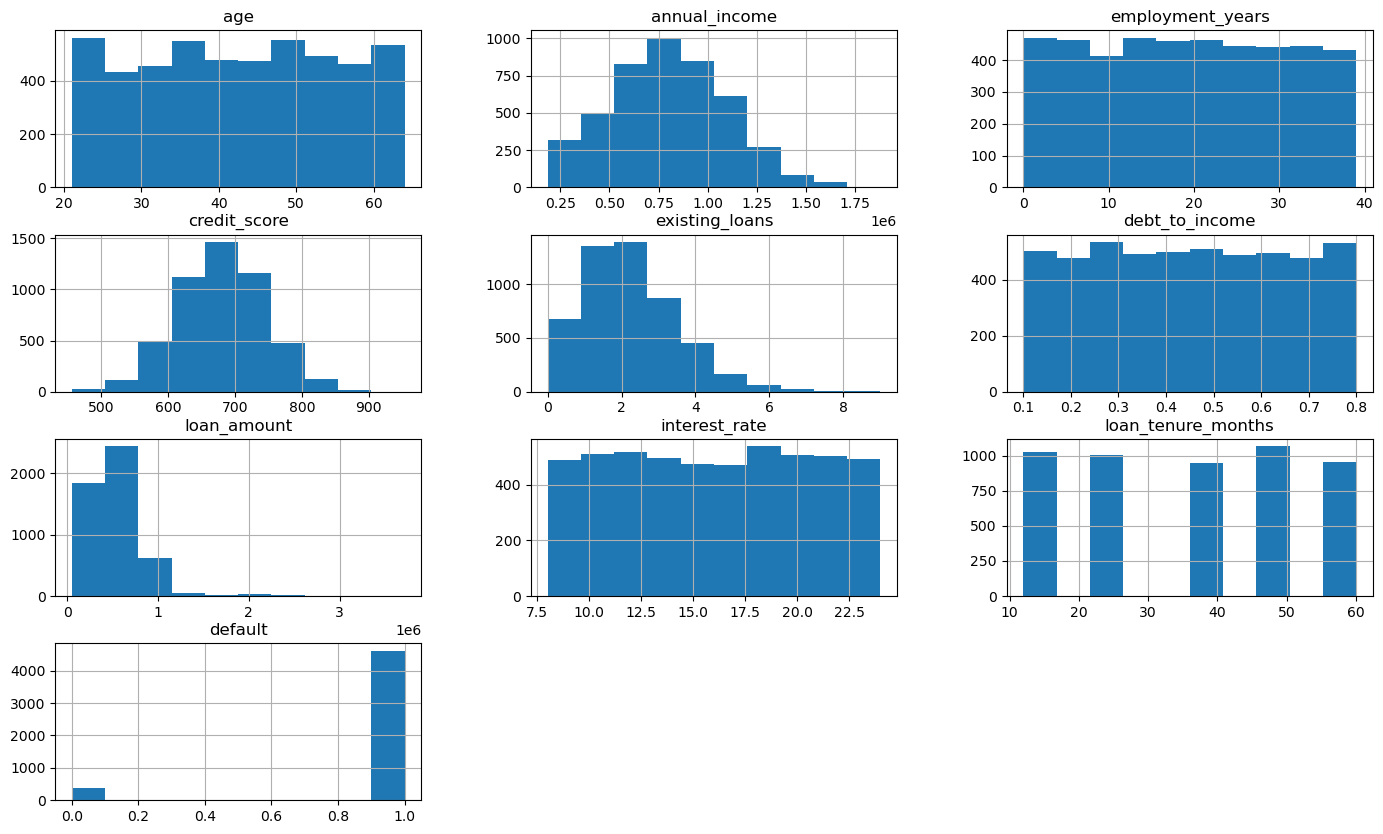

In [53]:
noisy_data.hist(figsize=(17,10))
mlt.tightlayout()

In [69]:
def detect_outliers_iqr(df,column):
    q1=df[column].quantile(0.25)
    q2=df[column].quantile(0.75)
    iqr=q2-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q2+1.5*iqr
    return df[(df[column]<lower_bound ) |(df[column]>upper_bound)]

In [71]:
detect_outliers_iqr(noisy_data,"loan_amount").shape

(91, 10)

In [77]:
noisy_data.groupby("default")["credit_score"].mean()

default
0    691.615920
1    679.517526
Name: credit_score, dtype: float64

In [79]:
import seaborn as ss

<Axes: >

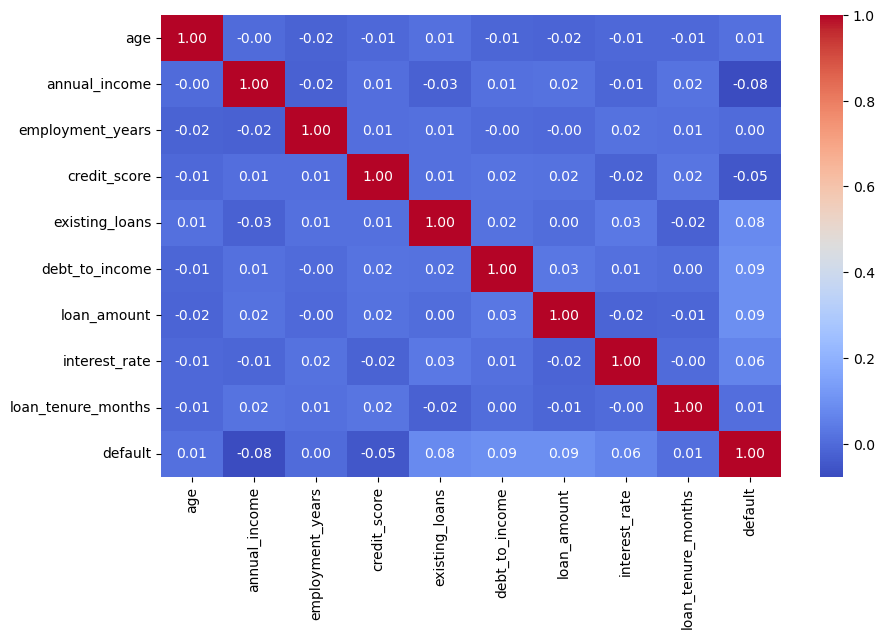

In [91]:
mlt.figure(figsize=(10,6))
ss.heatmap(noisy_data.corr(),annot=True,fmt=".2f",cmap="coolwarm")

In [95]:
noisy_data["annual_income"].fillna(
    noisy_data["annual_income"].mean(),inplace=True
)

C:\Users\HP\AppData\Local\Temp\ipykernel_22480\1491400070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  noisy_data["annual_income"].fillna(


In [ ]:
noisy_data["employment_years"].fillna(
    noisy_data["employment_years"].mean(),inplace=True
)

In [98]:
noisy_data.isnull().sum()

age                     0
annual_income           0
employment_years      500
credit_score            0
existing_loans          0
debt_to_income          0
loan_amount             0
interest_rate           0
loan_tenure_months      0
default                 0
dtype: int64

noisy_data.isnull().sum()
